In [4]:
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold

from utils.cross_validation import cross_validate
from utils.metrics import aucroc
from utils.estimators import ForestTreeWrapper
from utils.base_set import X_train, y_train, seed
from sklearn.ensemble import RandomForestClassifier



### Forest

In [10]:
mean_val_scores = []
std_val_scores = []
mean_train_scores = []
std_train_scores = []

k = 5
cv = StratifiedKFold(n_splits=k, shuffle=True, random_state=seed)
cols_val = [f"split_val_{i}" for i in range(k)]
cols_train = [f"split_train_{i}" for i in range(k)]
max_features_values =  [1, 5, 9, 13, 17, 21, 25]
for mf in max_features_values:
    rf = ForestTreeWrapper(n_estimators=200, random_state=seed, max_features=mf)
    auc_scores, _ = cross_validate(rf, X_train, y_train, metric=aucroc, use_decision=True, cv=cv)
    mean_val_scores.append(auc_scores.mean_val.aucroc)
    std_val_scores.append(auc_scores[cols_val].std(axis=1).aucroc)
    mean_train_scores.append(auc_scores.mean_train.aucroc)
    std_train_scores.append(auc_scores[cols_train].std(axis=1).aucroc)

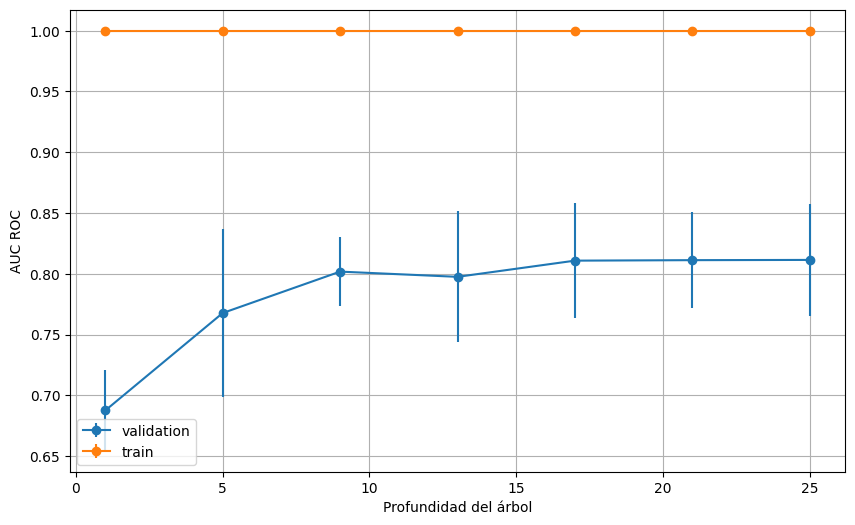

In [11]:
plt.figure(figsize=(10, 6))
plt.errorbar(max_features_values, mean_val_scores, std_val_scores, fmt='-o', label="validation")
plt.errorbar(max_features_values, mean_train_scores, std_train_scores, fmt='-o', label="train")
plt.legend()
plt.xlabel('Profundidad del árbol')
plt.ylabel('AUC ROC')
# plt.title('Curva de Complejidad para Árbol de Decisión (criterion=Entropy)')
plt.grid(True)
plt.show()